In [8]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [9]:
ligand_file = "kraken_DFT.xlsx"
fluor_file = 'PdPPe_Corr_master.xlsx'

In [14]:
ligands = pd.read_excel(ligand_file,
                       header=0,
                       index_col=False,
                       keep_default_na=True
                       )
fluors = pd.read_excel(ligand_file,
                       header=0,
                       index_col=False,
                       keep_default_na=True
                       )


print(ligands['smiles'].loc[[8,473,238,53,740,186,111,1558,60,61,41,17,15,1559,7,13,132,16,59,74,19,247,439,708,24,52,18,66,136,612,610]])
#ligands.head()
#print('\nnew:')
#print(ligands['smiles'].loc[[59,74,19,247,439]])

fluors = [0.10720997,
0.29666519,
0.154043033,
0.012837225,
0.181843588,
0.245512668,
-0.004364805,
0.643452676,
0.056904851,
-0.624591831,
-0.066672543,
-0.180456064,
0.204119983,
0.100370545,
0.264817823,
0.017033339,
0.460416812,
0.008600172,
0.264489833,
-0.062825872,
0.209323305,
0.035120443,
-0.257422578,
0.287951916,
0.242996402,
-0.107114557,
0.4516555,
-0.175254279,
0.199541888,
0.648928376,
0.120695872]
indx = [8,473,238,53,740,186,111,1558,60,61,41,17,15,1559,7,13,132,16,59,74,19,247,439,708,24,52,18,66,136,612,610]

8                          Cc1ccccc1P(c1ccccc1C)c1ccccc1C
473               O=S(=O)(O)c1cccc(P(c2ccccc2)c2ccccc2)c1
238                                    C1N2CN3CN1CP(C2)C3
53                             c1coc(P(c2ccco2)c2ccco2)c1
740     O=C(O)c1ccc(P(c2ccc(C(=O)O)cc2)c2ccc(C(F)(F)F)...
186     CC(C)(C)c1ccc(OP(Oc2ccc(C(C)(C)C)cc2C(C)(C)C)O...
111                    CN(C)c1ccc(P(c2ccccc2)c2ccccc2)cc1
1558    O=S(=O)(O)c1cccc(P(c2cc(C(F)(F)F)cc(C(F)(F)F)c...
60                   Fc1ccc(P(c2ccc(F)cc2)c2ccc(F)cc2)cc1
61                COc1ccc(P(c2ccc(OC)cc2)c2ccc(OC)cc2)cc1
41                   CC(C)(C)P(c1ccccc1-c1ccccc1)C(C)(C)C
17                   Cc1ccc(P(c2ccc(C)cc2)c2ccc(C)cc2)cc1
15      FC(F)(F)c1ccc(P(c2ccc(C(F)(F)F)cc2)c2ccc(C(F)(...
1559    O=S(=O)(O)c1cccc(P(c2cccc(S(=O)(=O)O)c2)c2cccc...
7                             CC(C)(C)P(C(C)(C)C)C(C)(C)C
13                                   CP(C(C)(C)C)C(C)(C)C
132                                    N#CCCP(CCC#N)CCC#N
16            

In [15]:
indexing = []

for i in ligands['smiles']:
    lig_smi = ligands['smiles']
    for j in fluors['smiles']:
        fluor_smi = fluors['smiles']
        print('i:',lig_smi)
        print('j:',fluor_smi)
        
       



TypeError: list indices must be integers or slices, not str

In [16]:
ligands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Columns: 192 entries, ID to sterimol_burL_vburminconf
dtypes: float64(190), int64(1), object(1)
memory usage: 2.3+ MB


In [17]:
highlist = ligands['nbo_bds_e_avg_boltz'].nlargest(n=120)
print("Rank  ","kraken_index  ","smiles")
for i in range(120):
    index = list(highlist.index)[i]
    smiles = ligands['smiles'][list(highlist.index)[i]]
    print(i,"    ", str(index),"          ", str(smiles))

Rank   kraken_index   smiles
0      926            Cc1c(C)n(C(C)C)c(=NP(N=c2n(C(C)C)c(C)c(C)n2C(C)C)N=c2n(C(C)C)c(C)c(C)n2C(C)C)n1C(C)C
1      928            Cc1cc(C)c(-n2c(C)c(C)n(-c3c(C)cc(C)cc3C)c2=NP(N=c2n(-c3c(C)cc(C)cc3C)c(C)c(C)n2-c2c(C)cc(C)cc2C)C(C)C)c(C)c1
2      925            Cc1c(C)n(C(C)C)c(=NP(N=c2n(C(C)C)c(C)c(C)n2C(C)C)C(C)C)n1C(C)C
3      880            B1NBNB(P(B2NBNBN2)B2NBNBN2)N1
4      1311            Cc1cc(C)c(B(c2c(C)cc(C)cc2C)P(c2ccccc2)c2ccccc2)c(C)c1
5      934            Cc1cc(C)c(P(N=c2n(C(C)C)c(C)c(C)n2C(C)C)c2c(C)cc(C)cc2C)c(C)c1
6      1066            Cc1cc(N(C)C)ccc1P(c1ccc(N(C)C)cc1C)c1ccc(N(C)C)cc1C
7      402            C(#CP(C#Cc1ccccc1)C#Cc1ccccc1)c1ccccc1
8      884            CC(C)c1cccc(C(C)C)c1N1C=CN(c2c(C(C)C)cccc2C(C)C)B1P(N(C)C)N(C)C
9      49            COc1cc(OC)c(P(c2c(OC)cc(OC)cc2OC)c2c(OC)cc(OC)cc2OC)c(OC)c1
10      1245            CC(C)(C)C#CP(C#CC(C)(C)C)c1ccccc1
11      881            Cc1ccccc1P(B1C=CC=CN1C)c1ccccc1C
12      933     

In [18]:
highlist = ligands['nbo_bds_e_avg_boltz'].nlargest(n=120)
print("smiles")
for i in range(120):
    index = list(highlist.index)[i]
    smiles = ligands['smiles'][list(highlist.index)[i]]
    print(smiles)

smiles
Cc1c(C)n(C(C)C)c(=NP(N=c2n(C(C)C)c(C)c(C)n2C(C)C)N=c2n(C(C)C)c(C)c(C)n2C(C)C)n1C(C)C
Cc1cc(C)c(-n2c(C)c(C)n(-c3c(C)cc(C)cc3C)c2=NP(N=c2n(-c3c(C)cc(C)cc3C)c(C)c(C)n2-c2c(C)cc(C)cc2C)C(C)C)c(C)c1
Cc1c(C)n(C(C)C)c(=NP(N=c2n(C(C)C)c(C)c(C)n2C(C)C)C(C)C)n1C(C)C
B1NBNB(P(B2NBNBN2)B2NBNBN2)N1
Cc1cc(C)c(B(c2c(C)cc(C)cc2C)P(c2ccccc2)c2ccccc2)c(C)c1
Cc1cc(C)c(P(N=c2n(C(C)C)c(C)c(C)n2C(C)C)c2c(C)cc(C)cc2C)c(C)c1
Cc1cc(N(C)C)ccc1P(c1ccc(N(C)C)cc1C)c1ccc(N(C)C)cc1C
C(#CP(C#Cc1ccccc1)C#Cc1ccccc1)c1ccccc1
CC(C)c1cccc(C(C)C)c1N1C=CN(c2c(C(C)C)cccc2C(C)C)B1P(N(C)C)N(C)C
COc1cc(OC)c(P(c2c(OC)cc(OC)cc2OC)c2c(OC)cc(OC)cc2OC)c(OC)c1
CC(C)(C)C#CP(C#CC(C)(C)C)c1ccccc1
Cc1ccccc1P(B1C=CC=CN1C)c1ccccc1C
Cc1c(C)n(C(C)C)c(=NP(c2ccccc2)c2ccccc2)n1C(C)C
COc1cc(C)c(P(c2c(C)cc(OC)cc2C)c2c(C)cc(OC)cc2C)c(C)c1
CN(C)c1ccc(P(c2ccc(N(C)C)cc2)c2ccc(N(C)C)cc2)cc1
COc1cccc(OC)c1-c1ccccc1-p1c(C)c(C)c(C)c1C
COc1cccc(OC)c1P(c1c(OC)cccc1OC)c1c(OC)cccc1OC
Cc1cc(C)c(C)c(P(c2c(C)c(C)cc(C)c2C)c2c(C)c(C)cc(C)c2C)c1C
c1cc2c3c(c

In [19]:
lowlist = ligands['nbo_bds_e_avg_boltz'].nsmallest(n=120)
print("Rank  ","kraken_index  ","smiles")
for i in range(120):
    index = list(lowlist.index)[i]
    smiles = ligands['smiles'][list(lowlist.index)[i]]
    print(i,"    ", str(index),"          ", str(smiles))
    

Rank   kraken_index   smiles
0      1546            ClCCSP(SCCCl)SCCCl
1      822            ClC(Cl)(Cl)P(C(Cl)(Cl)Cl)C(Cl)(Cl)Cl
2      1511            FC(F)(F)C(F)(F)C(F)(F)P(C(F)(F)C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)C(F)(F)F
3      830            FC(F)(F)C(F)(F)P(C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)F
4      564            c1ccc(SP(Sc2ccccc2)Sc2ccccc2)cc1
5      436            CSP(SC)SC
6      534            CC12CSP(SC1)SC2
7      1519            CCCCSP(SCCCC)SCCCC
8      1446            FC(F)(F)P(C(F)(F)F)C(F)(Cl)Cl
9      400            FC(F)(F)P(C(F)(F)F)C(F)(F)F
10      503            N#CSP1OC(=O)c2ccccc2O1
11      765            FC(F)(F)OP(OC(F)(F)F)OC(F)(F)F
12      1395            CP(C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)F
13      1230            COP(SC)SC
14      547            CSP(C)SC
15      766            FC(F)(F)C(OP(OC(C(F)(F)F)(C(F)(F)F)C(F)(F)F)OC(C(F)(F)F)(C(F)(F)F)C(F)(F)F)(C(F)(F)F)C(F)(F)F
16      565            c1ccc(SP(Sc2ccccc2)c2ccccc2)cc1
17      1477            CC(C)CP(C(F)(F)

In [20]:
lowlist = ligands['nbo_bds_e_avg_boltz'].nsmallest(n=120)
print("smiles")
for i in range(120):
    index = list(lowlist.index)[i]
    smiles = ligands['smiles'][list(lowlist.index)[i]]
    print(smiles)

smiles
ClCCSP(SCCCl)SCCCl
ClC(Cl)(Cl)P(C(Cl)(Cl)Cl)C(Cl)(Cl)Cl
FC(F)(F)C(F)(F)C(F)(F)P(C(F)(F)C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)C(F)(F)F
FC(F)(F)C(F)(F)P(C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)F
c1ccc(SP(Sc2ccccc2)Sc2ccccc2)cc1
CSP(SC)SC
CC12CSP(SC1)SC2
CCCCSP(SCCCC)SCCCC
FC(F)(F)P(C(F)(F)F)C(F)(Cl)Cl
FC(F)(F)P(C(F)(F)F)C(F)(F)F
N#CSP1OC(=O)c2ccccc2O1
FC(F)(F)OP(OC(F)(F)F)OC(F)(F)F
CP(C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)F
COP(SC)SC
CSP(C)SC
FC(F)(F)C(OP(OC(C(F)(F)F)(C(F)(F)F)C(F)(F)F)OC(C(F)(F)F)(C(F)(F)F)C(F)(F)F)(C(F)(F)F)C(F)(F)F
c1ccc(SP(Sc2ccccc2)c2ccccc2)cc1
CC(C)CP(C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)F
CSP(F)F
CC(C)P(C(F)(F)F)C(F)(F)F
CN(c1ccccc1)P(C(Cl)(Cl)Cl)C(Cl)(Cl)Cl
CP(C(F)(F)F)C(F)(F)F
FC(F)(F)C(F)(F)C(F)(F)P(c1ccccc1)C(F)(F)C(F)(F)C(F)(F)F
COP(C(F)(F)F)C(F)(F)F
CC(=O)O[C@H](P([C@@H](OC(C)=O)C(Cl)(Cl)Cl)[C@@H](OC(C)=O)C(Cl)(Cl)Cl)C(Cl)(Cl)Cl
CC(C)(C)OC(=O)C(P(n1ccnc1)n1ccnc1)(C(F)(F)F)C(F)(F)F
CCSP(SCC)N(CC)CC
FC(F)(F)C(F)(F)P(N1CCc2ccccc21)C(F)(F)C(F)(F)F
Fc1c(F)c(F)c(OP(Oc2c(F)c(F)c(F)c(F)c2F)O

In [21]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [22]:
ligands = ligands.loc[:, ligands.columns!='smiles']
ligands = ligands.loc[:, ligands.columns!='ID']
ligands.head()

,vmin_vmin_boltz,vmin_r_boltz,fmo_e_homo_boltz,fmo_e_lumo_boltz,fmo_mu_boltz,fmo_eta_boltz,fmo_omega_boltz,somo_ra_boltz,somo_rc_boltz,nbo_P_boltz,...,sterimol_burB5_boltz,sterimol_burB5_min,sterimol_burB5_max,sterimol_burB5_delta,sterimol_burB5_vburminconf,sterimol_burL_boltz,sterimol_burL_min,sterimol_burL_max,sterimol_burL_delta,sterimol_burL_vburminconf
0,-0.061654,1.819048,-0.218243,-0.025112,-0.121678,0.193131,0.038336,0.059115,-0.363712,0.801914,...,7.439480,6.306577,7.835474,1.528897,7.262693,7.291573,7.106519,8.238802,1.132283,7.735548
1,-0.063670,1.784157,-0.206310,-0.023277,-0.114794,0.183033,0.036033,0.061658,-0.345264,0.816302,...,6.572514,6.339063,7.850955,1.511892,6.407769,7.285463,6.908743,8.216943,1.308200,7.992698
2,-0.066303,1.798595,-0.213323,-0.016923,-0.115123,0.196400,0.033750,0.069846,-0.356952,0.796412,...,7.156276,6.349086,7.287324,0.938238,7.021625,7.306643,7.025374,8.361404,1.336030,7.424874
3,-0.067319,1.795292,-0.211571,-0.013802,-0.112687,0.197770,0.032124,0.070775,-0.349017,0.798225,...,7.238774,6.369287,7.813010,1.443723,7.653520,7.338674,6.996319,8.333428,1.337110,7.483233
4,-0.061351,1.816461,-0.218842,-0.030145,-0.124494,0.188697,0.041069,0.060353,-0.376125,0.787516,...,6.497622,6.092458,7.055260,0.962802,6.376705,7.370445,7.021018,8.155038,1.134020,8.086289


In [23]:
ligands = clean_dataset(ligands)

In [24]:
mmscaler = Pipeline(
    [
        ("scaler", MinMaxScaler())
    ]
)

In [25]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=4, random_state=42)),
    ]
)

In [26]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=5,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [27]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [28]:
pipe.fit(ligands)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=4, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [33]:
preprocessed_data = pipe["preprocessor"].transform(ligands)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.25247553025271613

/Users/tht13/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


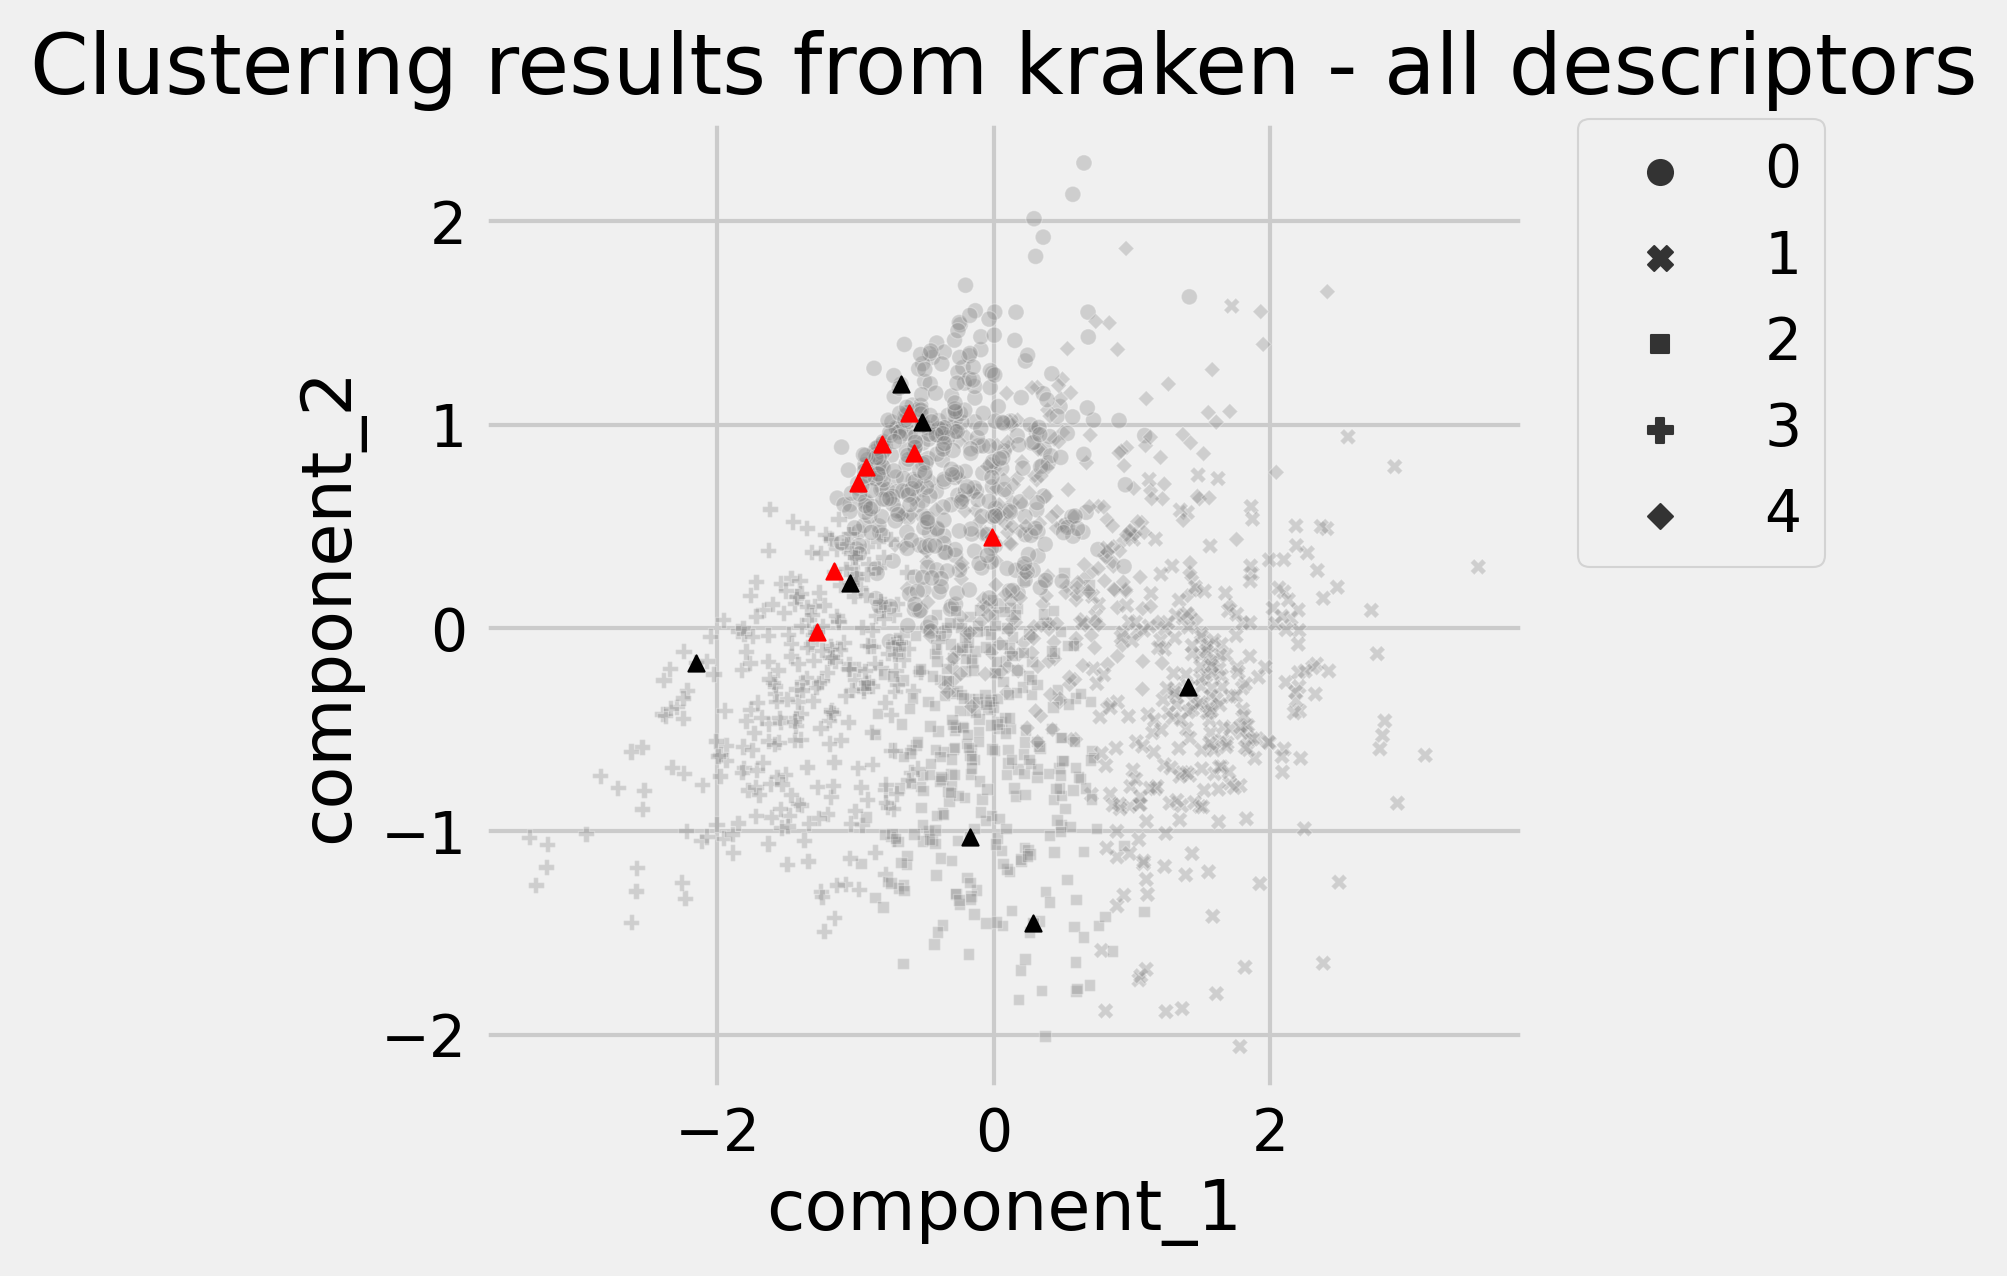

In [34]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(ligands),
    columns=["component_1", "component_2","component_3","component_4"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

#print(pcadf)
#print(pcadf['component_1'])

plt.style.use("fivethirtyeight")
plt.figure(figsize=(4, 4))
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=15,
    data=pcadf,
    style='predicted_cluster',
    color="gray",
    alpha=.3,
    palette="Set2",
)

scat.set_title(
    "Clustering results from kraken - all descriptors"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

positive = [132,238,7,15,473,740,186]
negative = [13,111,60,8,61,17,53,16]

for i in positive:
    plt.scatter(pcadf.loc[i][0], pcadf.loc[i][1], color='Black',s=15, marker='^')
    #plt.annotate(i, (pcadf.loc[i][0], pcadf.loc[i][1]))
for i in negative:
    plt.scatter(pcadf.loc[i][0], pcadf.loc[i][1], color='Red',s=15, marker='^')
    #plt.annotate(i, (pcadf.loc[i][0], pcadf.loc[i][1]))

plt.show()

In [103]:
pcadf.head()

,component_1,component_2,component_3,component_4,predicted_cluster
0,2.127811,-0.571150,-0.334764,-0.385457,1
1,1.919073,-0.622782,-0.417547,-0.257502,1
2,1.598347,-0.504522,-0.458607,-0.285828,1
3,2.118305,-0.688493,-0.254155,-0.414914,1
4,1.395999,-0.698559,-0.572908,-0.286808,1


xval: -0.15284597567299818
yval: -1.055765225062951 

xval: -2.162579521168971
yval: -0.19332396269346727 

xval: -1.0583278534919864
yval: 0.24598432954411148 

xval: -0.6973456212941884
yval: 1.183125940271597 

xval: -0.5430538569424518
yval: 0.9934069896922816 

xval: 0.31792526766856805
yval: -1.4605739355366438 

xval: 1.4112747307626035
yval: -0.28031374000346004 

xval: -0.027456596923557924
yval: 0.4713275624777668 

xval: -0.6397584680416436
yval: 1.0527866825855405 

xval: 1.0965377961746599
yval: -0.27886917650221626 

xval: -0.948067581294319
yval: 0.7858200429556607 

xval: -0.5967299251791459
yval: 0.8532217254748583 

xval: -0.8311563152054919
yval: 0.899479181643023 

xval: -1.1641853212843423
yval: 0.2650603880417709 

xval: -1.004140256727179
yval: 0.708919686518542 

xval: 0.2827557357892214
yval: 1.2310118788860056 

xval: -0.161676246466342
yval: -0.7271360911394689 

xval: -0.09746753691294313
yval: -1.2912964171324706 

xval: -0.20494794539942693
yval: -0.813171

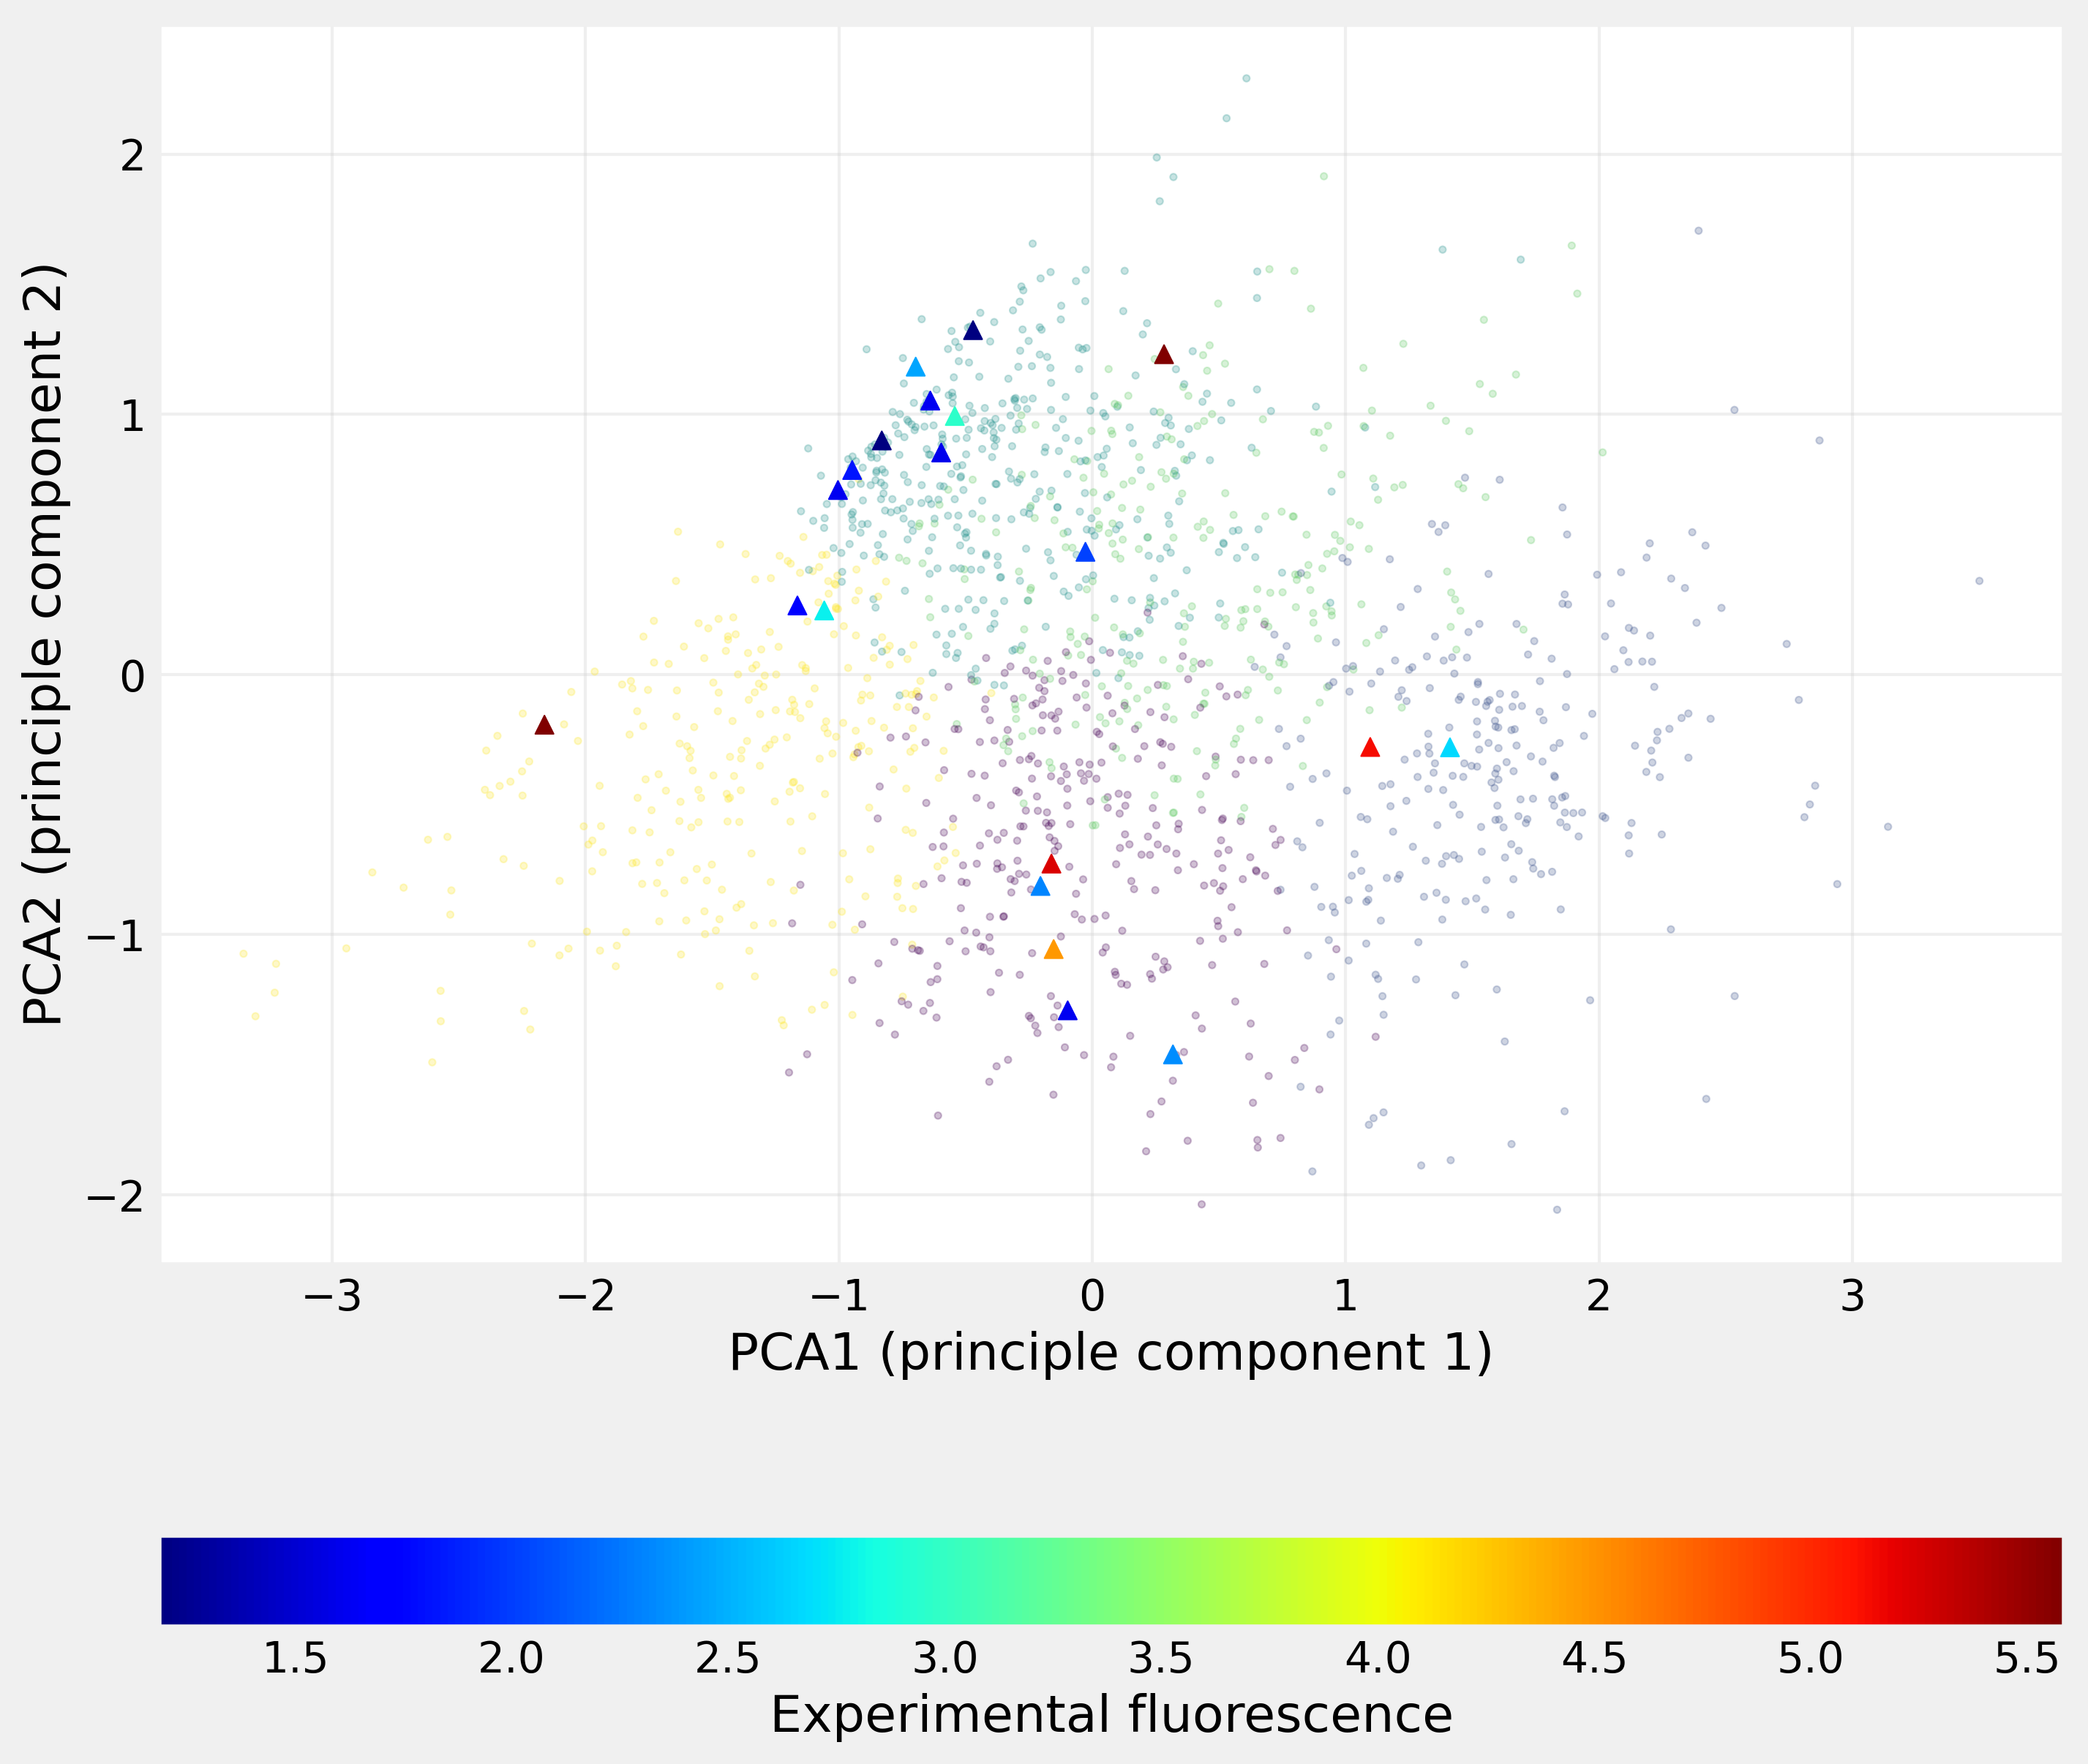

-0.47112541765386456

In [104]:
plt.figure(figsize=(10,10))

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

plt.scatter(pcadf['component_1'],pcadf['component_2'],c=pcadf['predicted_cluster'],s=5, alpha=.25, label='kraken')
plt.xlabel("PCA1 (principle component 1)")
plt.ylabel("PCA2 (principle component 2)")

fluors = [3.1,3.93,1.84,1.6,1.98,1.52,1.76,1.28,0.99,3.59,1.14,0.97,0.66,1.03,0.99]
indx = [132,238,7,15,473,740,186,8,111,41,60,61,17,53,16]
indx_new = [59,74,19,247,439]
fluors_new = [5.59,5.23,1.62,2.31,1.18]

x = []
y = []
x_new = []
y_new = []

for i in range(len(indx)):
    x_val = pcadf['component_1'][indx[i]]
    print('xval:',x_val)
    y_val = pcadf['component_2'][indx[i]]
    print('yval:',y_val,'\n')
    x.append(x_val)
    y.append(y_val)
for i in range(len(indx_new)):
    x_val = pcadf['component_1'][indx_new[i]]
    print('xval:',x_val)
    y_val = pcadf['component_2'][indx_new[i]]
    print('yval:',y_val,'\n')
    x_new.append(x_val)
    y_new.append(y_val)

plt.scatter(x,y,c=fluors, cmap='jet', marker="^",label='experimental')
plt.scatter(x_new,y_new,c=fluors_new, cmap='jet', marker="^",label='experimental')
plt.colorbar(label="Experimental fluorescence", orientation="horizontal", pad=0.15)
plt.grid(alpha=.3)
#plt.legend(loc='upper left') 
plt.show()

x_val

In [127]:
indx = [132,238,7,15,473,740,186,8,111,41,60,61,17,53,16]
indx_new = [59,74,19,247,439]
print(pcadf.loc[439]) # x = [i][0]  y = [i][1]


    



component_1         -0.471125
component_2          1.323504
component_3          0.259947
component_4         -0.457511
predicted_cluster    2.000000
Name: 439, dtype: float64


In [110]:
pcadf.head()

,component_1,component_2,predicted_cluster
0,2.127811,-0.571150,5
1,1.919073,-0.622782,5
2,1.598347,-0.504522,5
3,2.118305,-0.688493,5
4,1.395999,-0.698559,5


In [28]:
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(ligands)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(ligands),
        pipe["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
        predicted_labels,
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

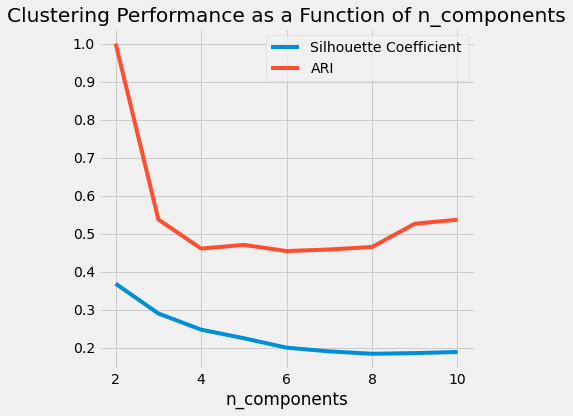

In [20]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()

In [111]:
ligands.head()

,vmin_vmin_boltz,vmin_r_boltz,fmo_e_homo_boltz,fmo_e_lumo_boltz,fmo_mu_boltz,fmo_eta_boltz,fmo_omega_boltz,somo_ra_boltz,somo_rc_boltz,nbo_P_boltz,...,sterimol_burB5_boltz,sterimol_burB5_min,sterimol_burB5_max,sterimol_burB5_delta,sterimol_burB5_vburminconf,sterimol_burL_boltz,sterimol_burL_min,sterimol_burL_max,sterimol_burL_delta,sterimol_burL_vburminconf
0,-0.061654,1.819048,-0.218243,-0.025112,-0.121678,0.193131,0.038336,0.059115,-0.363712,0.801914,...,7.439480,6.306577,7.835474,1.528897,7.262693,7.291573,7.106519,8.238802,1.132283,7.735548
1,-0.063670,1.784157,-0.206310,-0.023277,-0.114794,0.183033,0.036033,0.061658,-0.345264,0.816302,...,6.572514,6.339063,7.850955,1.511892,6.407769,7.285463,6.908743,8.216943,1.308200,7.992698
2,-0.066303,1.798595,-0.213323,-0.016923,-0.115123,0.196400,0.033750,0.069846,-0.356952,0.796412,...,7.156276,6.349086,7.287324,0.938238,7.021625,7.306643,7.025374,8.361404,1.336030,7.424874
3,-0.067319,1.795292,-0.211571,-0.013802,-0.112687,0.197770,0.032124,0.070775,-0.349017,0.798225,...,7.238774,6.369287,7.813010,1.443723,7.653520,7.338674,6.996319,8.333428,1.337110,7.483233
4,-0.061351,1.816461,-0.218842,-0.030145,-0.124494,0.188697,0.041069,0.060353,-0.376125,0.787516,...,6.497622,6.092458,7.055260,0.962802,6.376705,7.370445,7.021018,8.155038,1.134020,8.086289
